# Linear Regression on PYNQ-Z1

In [1]:
from sklearn import datasets
from pynq_sklearn.linear_model import PynqLinearRegression

# Load dataset
boston = datasets.load_boston()
num_test = 50
data_train, targets_train = boston.data[:-num_test], boston.target[:-num_test]
data_test, targets_test = boston.data[-num_test:], boston.target[-num_test:]

#### 1. Fit a PYNQ Linear Regression Model
(**Note: this notebook will only work with the Boston dataset (or datasets with the same shape). This is because our HW accelerator has been hardcoded)

In [2]:
lin = PynqLinearRegression(fit_intercept=True, hw_accel=True)
lin.fit(data_train, targets_train)

#### 2. With hw_accel=True, deploy prediction on the FPGA 

In [3]:
y_pred = lin.predict(data_test)

#### 3. Alternatively, deploy in SW

In [4]:
lin.hw_accel=False
y_pred_sw = lin.predict(data_test)

#### 4. Verify equivalence

In [5]:
import numpy as np
np.allclose(y_pred, y_pred_sw)

True

#### 5. Seemless integration with Scikit-Learn
See http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html#sphx-glr-auto-examples-plot-cv-predict-py
##### 5.1. Model evaluation with score() 

In [6]:
lin.hw_accel=True
# goodness of fit measurement
r2 = lin.score(data_test, targets_test)
print("R^2=", r2)

R^2= 0.4186183690465872


##### 5.2. Apply a different metric

In [7]:
from sklearn import metrics
print("MSE=", metrics.mean_squared_error(y_pred, targets_test))

MSE= 10.96654356651113


##### 5.3. Model selection via cross-validation

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.8s finished


R^2= 0.4403980044505058
MSE= 34.59704354863101


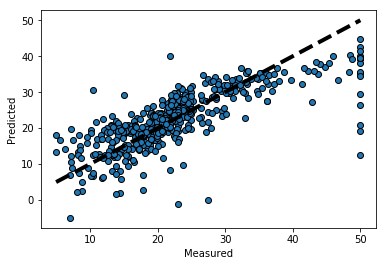

In [10]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_predict

y=boston.target
#predicted = lin.predict(data_test)
predicted = cross_val_predict(lin, boston.data, y, cv=10, verbose=3)

print("R^2=", metrics.r2_score(predicted, y))
print("MSE=", metrics.mean_squared_error(predicted, y))

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()